In [1]:
library("ggplot2")

# Exercise 1 - Discrete random variable
Let X ∼ ZTB(n, p) be a random variable following a Zero-Truncated Binomial Distribution in which:
- n ∈ N is the number of Bernoulli trials.
- p ∈ (0, 1) is the probability of success on a single trial.

Then, the probability mass function (PMF) is defined as:
$$P(X=k) = \frac{{n \choose k} p^k (1-p)^{n-k}}{1-(1-p)^n}\; \mathrm{, for}\; k=1,2,\dots,n$$

Assuming $n = 14$ and $p = 0.15$.

(1) Write the R functions for the PMF and cumulative distribution (CDF), using the R naming convention.

In [2]:
PMF <- function (n,k,p) {
    # k has to be in (1,n)
    return( (choose(n,k) * (p**k) * (1-p)**(n-k)) / (1-(1-p)**n) )
}
CDF <- function (n,k,p) {
    # k has to be in (1,n)
    if (length(k) == 1) {
        value_to_return <- k
        k <- 1:k
    } else {
        value_to_return <- k
    }
    return(cumsum(PMF(n,k,p))[value_to_return])
}

(2) Produce two plots showing the PMF and CDF, separately.

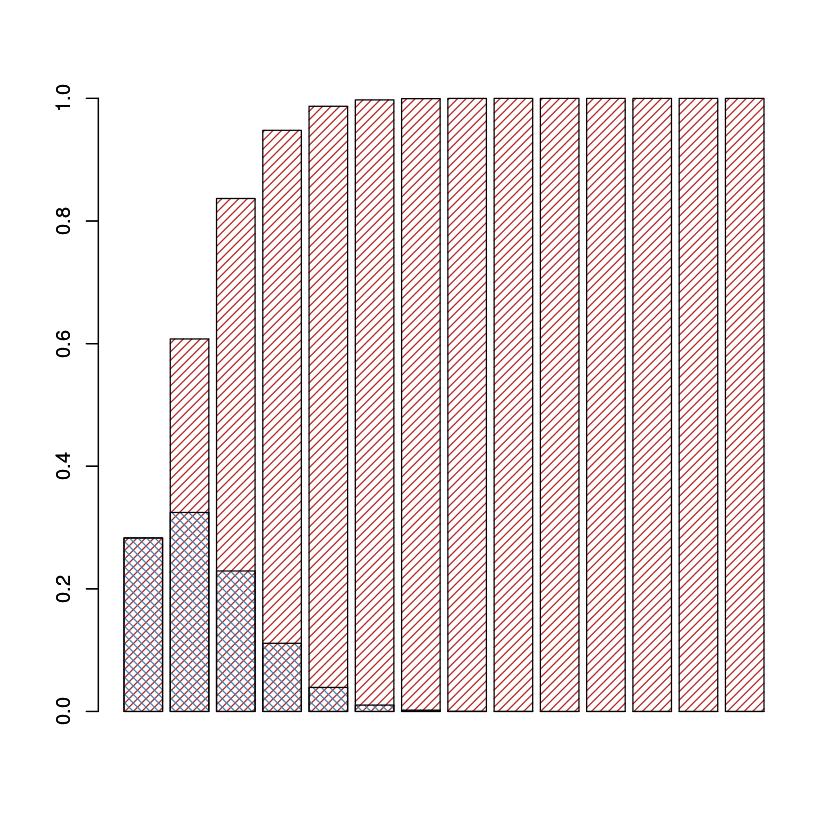

In [3]:
n <- 14
list_k <- 1:n
p <- 0.15

pmf_values <- PMF(n,list_k,p)
cdf_values <- CDF(n,list_k,p)

barplot(cdf_values, density=20, col="firebrick")
barplot(pmf_values, density=20, angle=-45, col="steelblue", add=TRUE)

(3) Compute the mean value and variance of the ZTB distribution using R. Compare the obtained values with the analytical statistical moments for the zero-truncated and the standard binomial distributions.

(4) Generate a sample of random numbers from this distribution, show them in an histogram, and evaluate the sample mean.

# Exercise 2 - Continuous Random Variable
The energy distribution of CR muons at sea level can be approximated as follows
...


(1) Compute the normalisation factor N using R.

(2) Plot the probability density function in R.

(3) Plot the cumulative density function in R.

(4) Compute the mean value using R.

(5) Generate 106 random numbers from this distribution, show them in an histogram and superimpose the pdf (with a line or with a sufficient number of points).

# Exercise 3 - Web Server Requests
The average number of requests to a small web server is 7 per day.

(1) Find a bound for the probability that at least 30 web server requests will occur tomorrow.

(2) Under regular conditions, the number of web server requests can be modeled as Poisson process, calculate the probability that at least 30 requests will occur tomorrow. Compare this value with the bound obtained in the previous point (1).

(3) Let the variance of the number of requests be 5 per day, find a bound on the probability that tomorrow at least 30 requests will occur.

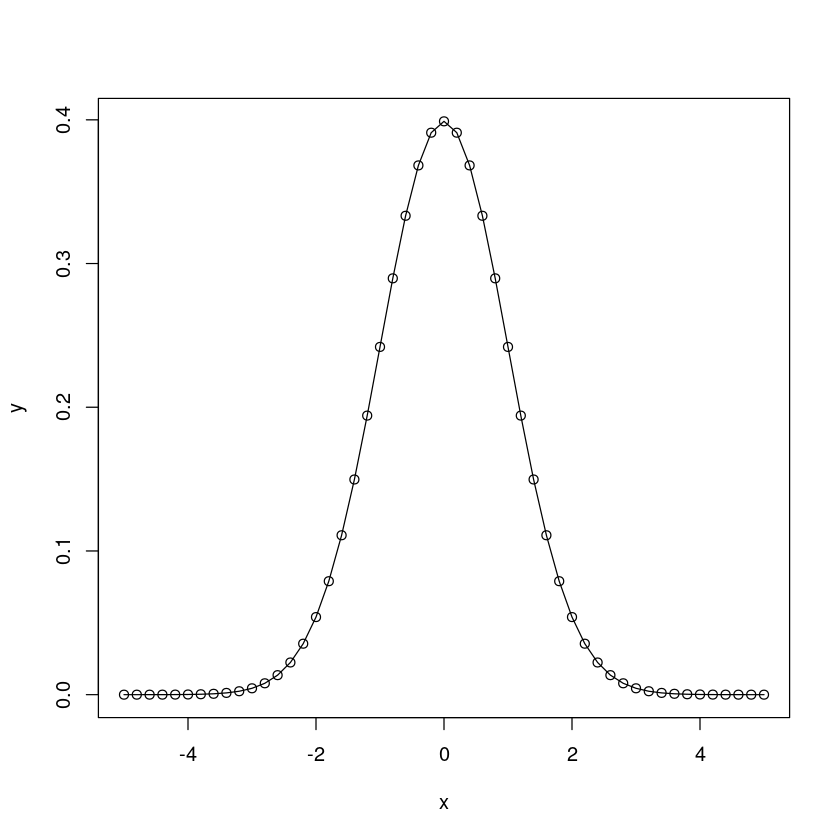

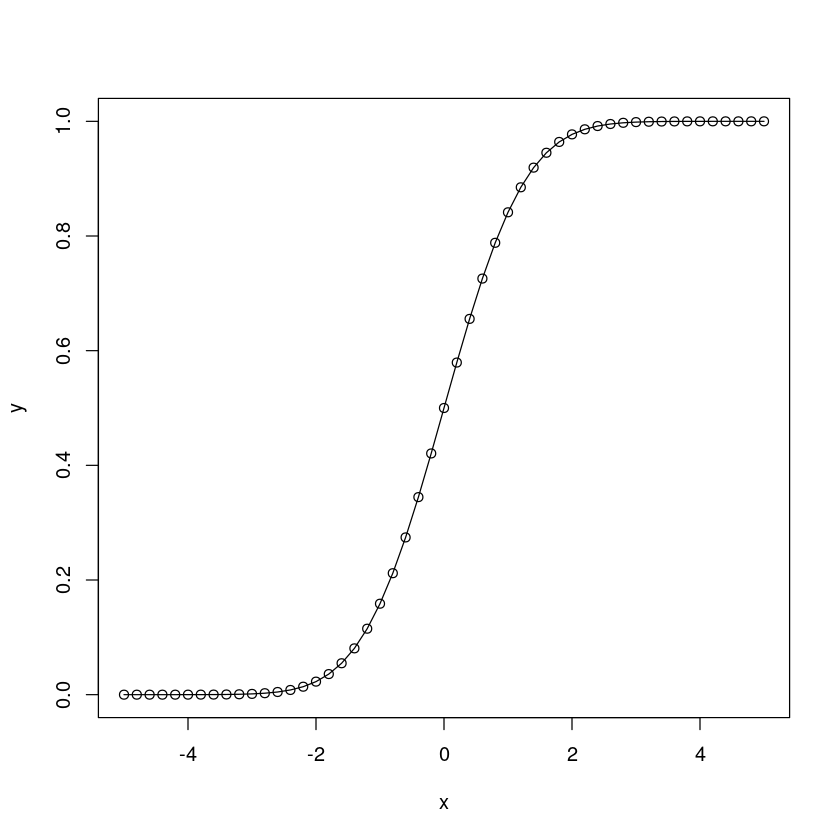

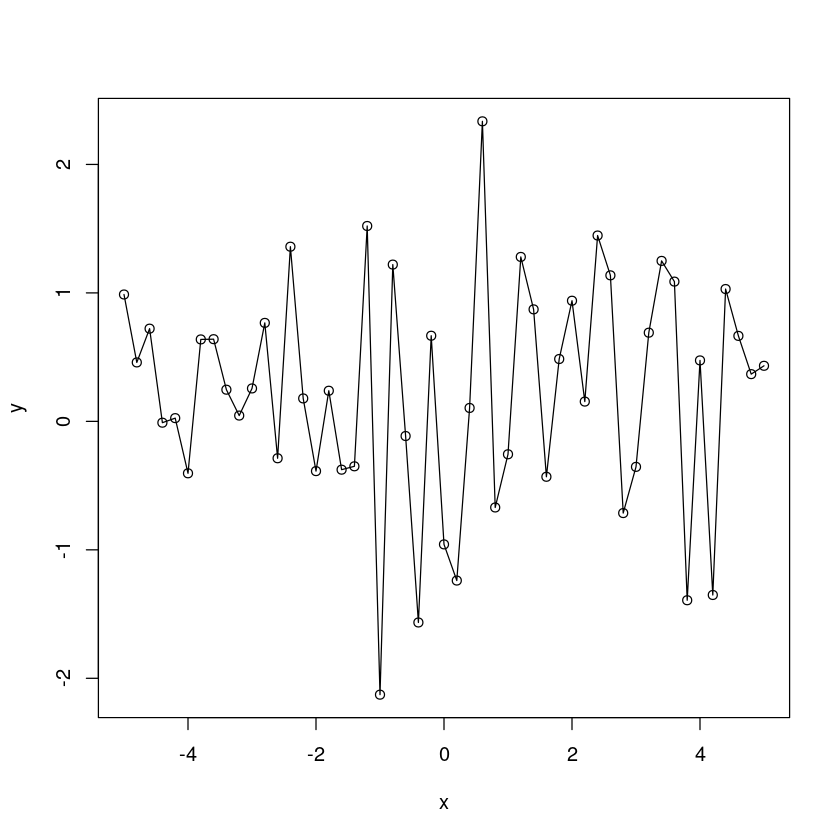

In [4]:
a <- -5
b <- 5
step <- 0.2
mean <- 0
sd <- 1

x <- seq(a,b,step)
y <- dnorm(x, mean=mean, sd=sd)
plot(x, y)
lines(x, y)

y <- pnorm(x, mean=mean, sd=sd)
plot(x, y)
lines(x, y)

y <- rnorm(x, mean=mean, sd=sd)
plot(x, y)
lines(x, y)